# Insurance Fraud Analysis and Data Preparation for Power BI


## Problem Statement:

TrustGuard Insurance is facing significant financial losses due to fraudulent claims, which account for 15% of total claim payouts—well above the industry average of 5%. The company processes over 100,000 claims annually, with a total payout of approximately 1 billion. The goal is to identify fraudulent claims early in the process, saving millions, and reducing delays in processing legitimate claims.
This dashboard aims to help TrustGuard Insurance identify patterns, detect anomalies, and make data-driven decisions to reduce fraudulent claims while ensuring fair and fast processing for legitimate ones. This can be used in African context to improve insurance companies profits.

## Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Load the dataset

In [3]:
data = pd.read_csv("insurance_claims.csv")

## Display the first few rows to understand the structure of the dataset

In [4]:
print("\n--- First 5 Rows of the Dataset ---")
print(data.head())


--- First 5 Rows of the Dataset ---
   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount inju

## Check for missing values

In [5]:
print("\n--- Missing Values in Each Column ---")
print(data.isnull().sum())


--- Missing Values in Each Column ---
months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involv

## Fill missing values

In [6]:
data['fraud_reported'] = data['fraud_reported'].fillna('N')  # Assume 'N' for missing fraud indicators
data['witnesses'] = data['witnesses'].fillna(0)              # Replace missing witnesses with 0
data['property_damage'] = data['property_damage'].fillna('NO') # Assume 'NO' for missing property damage reports

## Create new feature: claim_to_premium_ratio

In [7]:
data['claim_to_premium_ratio'] = data['total_claim_amount'] / data['policy_annual_premium']

## Display summary statistics

In [7]:
print("\n--- Summary Statistics ---")
print(data.describe())


--- Summary Statistics ---
       months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.

## Visualize distributions of key variables

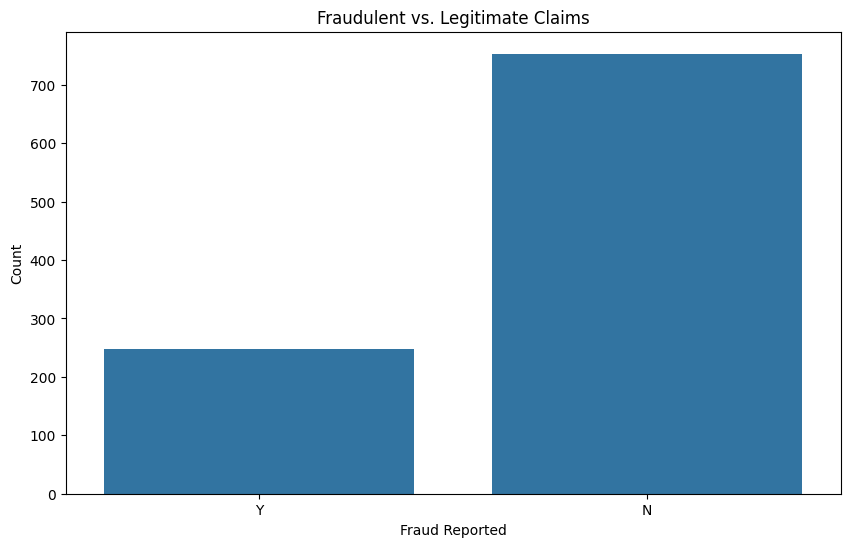

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='fraud_reported')
plt.title("Fraudulent vs. Legitimate Claims")
plt.xlabel("Fraud Reported")
plt.ylabel("Count")
plt.show()


## Export cleaned data for Power BI

In [10]:
cleaned_data_file = "cleaned_insurance_claims.csv"
data.to_csv(cleaned_data_file, index=False)
print(f"\nCleaned data has been saved to {cleaned_data_file}")


Cleaned data has been saved to cleaned_insurance_claims.csv


# Power BI Analysis

![Description of Image](Fraud_by_Customer_Demographics.png)


## 1. Fraud by Customer Demographics
**Business Value:**  
This visual identifies demographic trends in fraudulent claims, enabling targeted anti-fraud measures and personalized customer strategies.

**Analytical Example:**  
If analysis reveals that customers in certain occupations (e.g., machine-op-inspct in this case) file 20% more fraudulent claims than others, the company can flag claims from this group for further investigation. Additionally, stricter verification protocols could be implemented for these segments.


![Description of Image](Fraud_Hotspots.png)


## 2. Fraud Hotspots
**Business Value:**  
Identifying geographic hotspots for fraudulent claims allows the company to allocate resources efficiently and implement targeted interventions in high-risk areas.

**Analytical Example:**  
If South Carolina accounts for 15% of all fraudulent claims, with specific cities reporting the highest numbers, the company can deploy more fraud analysts and improve verification processes in those areas.

![Description of Image](Fraud_by_Incident_Attributes.png)


## 3. Fraud by Incident Attributes
**Business Value:**  
This visual helps identify which incident types or severity levels are most associated with fraud, enabling the company to allocate resources effectively and prioritize investigations.

**Analytical Example:**  
If Minor Damage incidents account for higher of all fraudulent claims, the company can implement enhanced Minor Damage processes and focus anti-fraud efforts on these cases.


![Description of Image](Incident_Time_Analysis.png)


## 4. Incident Time Analysis
**Business Value:**  
This visual highlights temporal patterns in fraudulent claims, allowing the company to predict and prepare for peak fraud periods.

**Analytical Example:**  
If fraudulent claims spike during nighttime (10 AM–5 PM) or during specific seasons, the company can adjust staffing and enhance fraud detection during these times.


![Description of Image](Claims_vs._Payouts.png)


## 5. Claims vs. Payouts
**Business Value:**  
This visual compares the distribution of total claims and payouts across different incident types, helping the company identify anomalies and assess the financial impact of fraud.

**Analytical Example:**  
If Rear-collision claims account for more of total payouts but have a high fraud rate, the company can focus fraud detection measures on Rear-collision-related claims. Conversely, low-risk claim types can be fast-tracked to improve operational efficiency.

![Description of Image](Fraud_Trends_by_Policy_Details.png)


## 6. Fraud Trends by Policy Details
**Business Value:**  
This visual highlights which policy characteristics (e.g., state, coverage limits) are associated with higher fraud rates. It helps the company refine underwriting policies and risk assessments.

**Analytical Example:**  
If policies in a specific state (e.g., Ohio), the company can review policies in those segments and adjust premiums or introduce stricter claim validation protocols.


.


 .

### Future Application in the African Context  

The insights and methodologies from this fraud analysis report can be adapted to address challenges in the African insurance market, where fraud detection is a growing concern. Future applications could include:  

1. **Localized Fraud Detection Models**  
   By incorporating region-specific data such as socio-economic conditions, local regulations, and claim trends, insurers can build fraud detection models tailored to the African context.  

2. **Geographic Hotspot Mapping**  
   Identifying fraud hotspots in urban and rural areas can guide insurers in allocating resources efficiently and addressing region-specific risks. For instance, high fraud rates in densely populated cities can inform the deployment of specialized anti-fraud units.  

3. **Demographic and Occupational Analysis**  
   The report's approach to analyzing demographic trends can be applied to Africa’s diverse customer base. For example, understanding occupation-based risks or claim behaviors in informal sectors common in Africa could improve fraud prevention.  

4. **Policy Adjustments for Informal Markets**  
   Many African economies have significant informal markets. Insurers can use similar analytics to assess risk for this segment and design innovative, affordable policies with stricter validation protocols.  

5. **Technology-Driven Solutions**  
   Leveraging mobile technology, which is widely adopted in Africa, insurers can integrate real-time fraud detection algorithms and digital claim verification systems to reduce fraud.  

6. **Capacity Building and Awareness**  
   Insights from the report can help train local insurers in identifying fraud patterns while educating policyholders on the implications of fraudulent claims, fostering trust and reducing fraud prevalence.  

By adapting these insights, insurers across Africa can enhance fraud prevention, protect their financial stability, and ensure sustainable growth in the insurance sector.
